In [1]:
%matplotlib inline
from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [2]:
engine = create_engine("sqlite:///Database/hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
# Get measurements and stations
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
session = Session(engine)

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<AxesSubplot:xlabel='date'>

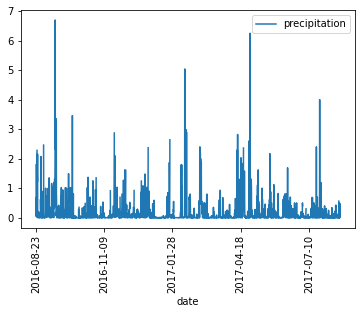

In [6]:
# Check last 12 months of precipitation data and plot the results. 

# Date one year from the last entry
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Retrieve data and precipitation and put into dataframe
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
last_year_prcp = pd.DataFrame(results, columns=['date', 'precipitation'])
last_year_prcp.set_index('date', inplace=True)
# Sort dataframe by date
last_year_prcp = last_year_prcp.sort_values("date")
last_year_prcp = last_year_prcp.sort_index()

# Statistical summary
display(last_year_prcp.describe())

# View data
last_year_prcp.plot(rot=90)

,avg_prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


<AxesSubplot:xlabel='date'>

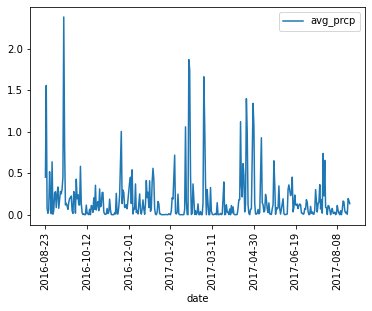

In [7]:
# Check average precipitation
avg_prcp = pd.DataFrame(results, columns=['date', 'avg_prcp']).dropna()
avg_prcp = avg_prcp.groupby(by='date').mean().sort_index()

# Statistical summary
display(avg_prcp.describe())

# View data
avg_prcp.plot(rot=90)

,june tmeps
count,240.000000
mean,75.010911
std,1.812103
min,69.500000
25%,73.857143
50%,75.000000
75%,76.270833
max,79.000000


<AxesSubplot:xlabel='date'>

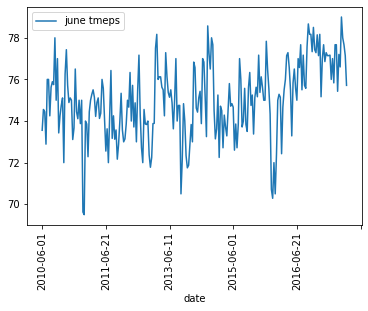

In [22]:
# Looking at June
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6)

# Get list of june temps and make datafame
june_temps_list = [(temp.date, temp.tobs) for temp in june_temps]
june_temps_df = pd.DataFrame(june_temps_list, columns=['date', 'daily tmeps'])
display(june_temps_df)

# Find daily average
june_avg_temp_df = june_temps_df.groupby(by='date').mean().sort_index()

# Stistical Summary
display(june_avg_temp_df.describe())

# View data
june_avg_temp_df.plot(rot=90)

In [11]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [12]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

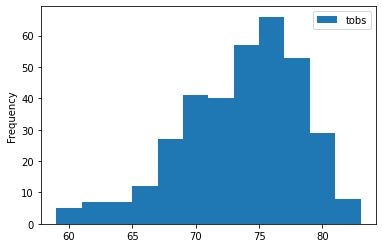

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
#print(df)
df.plot.hist(bins=12)
#plt.tight_layout()

In [15]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]
